## Understanding Handling of Categorical Dataset cat-inthe-dat

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("../inputs/cat-in-the-dat-train.csv")
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


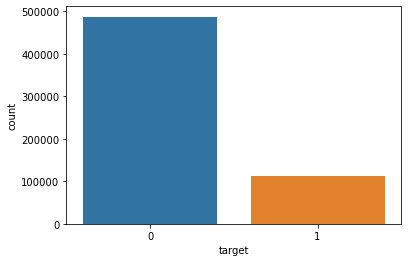

In [11]:
sns.countplot(x="target", data=df)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      600000 non-null  int64  
 1   bin_0   582106 non-null  float64
 2   bin_1   581997 non-null  float64
 3   bin_2   582070 non-null  float64
 4   bin_3   581986 non-null  object 
 5   bin_4   581953 non-null  object 
 6   nom_0   581748 non-null  object 
 7   nom_1   581844 non-null  object 
 8   nom_2   581965 non-null  object 
 9   nom_3   581879 non-null  object 
 10  nom_4   581965 non-null  object 
 11  nom_5   582222 non-null  object 
 12  nom_6   581869 non-null  object 
 13  nom_7   581997 non-null  object 
 14  nom_8   582245 non-null  object 
 15  nom_9   581927 non-null  object 
 16  ord_0   581712 non-null  float64
 17  ord_1   581959 non-null  object 
 18  ord_2   581925 non-null  object 
 19  ord_3   582084 non-null  object 
 20  ord_4   582070 non-null  object 
 21  ord_5   58

In [23]:
df.describe()

,id,bin_0,bin_1,bin_2,ord_0,day,month,target
count,600000.000000,582106.000000,581997.000000,582070.000000,581712.000000,582048.000000,582012.000000,600000.000000
mean,299999.500000,0.092301,0.185532,0.278704,1.948224,4.112767,6.371317,0.187205
std,173205.225094,0.289451,0.388729,0.448362,0.853904,2.034430,3.458959,0.390076
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,149999.750000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,0.000000
50%,299999.500000,0.000000,0.000000,0.000000,2.000000,5.000000,6.000000,0.000000
75%,449999.250000,0.000000,0.000000,1.000000,3.000000,6.000000,8.000000,0.000000
max,599999.000000,1.000000,1.000000,1.000000,3.000000,7.000000,12.000000,1.000000


In [27]:
df.isnull().sum()

id            0
bin_0     17894
bin_1     18003
bin_2     17930
bin_3     18014
bin_4     18047
nom_0     18252
nom_1     18156
nom_2     18035
nom_3     18121
nom_4     18035
nom_5     17778
nom_6     18131
nom_7     18003
nom_8     17755
nom_9     18073
ord_0     18288
ord_1     18041
ord_2     18075
ord_3     17916
ord_4     17930
ord_5     17713
day       17952
month     17988
target        0
dtype: int64

In [37]:
for col in df.columns:
    if col != "id" and col != "target":
        print(col)
        print(df[col].fillna("NONE").value_counts())
    

bin_0
0.0     528377
1.0      53729
NONE     17894
Name: bin_0, dtype: int64
bin_1
0.0     474018
1.0     107979
NONE     18003
Name: bin_1, dtype: int64
bin_2
0.0     419845
1.0     162225
NONE     17930
Name: bin_2, dtype: int64
bin_3
F       366212
T       215774
NONE     18014
Name: bin_3, dtype: int64
bin_4
N       312344
Y       269609
NONE     18047
Name: bin_4, dtype: int64
nom_0
Red      323286
Blue     205861
Green     52601
NONE      18252
Name: nom_0, dtype: int64
nom_1
Triangle     164190
Polygon      152563
Trapezoid    119438
Circle       104995
Square        26503
NONE          18156
Star          14155
Name: nom_1, dtype: int64
nom_2
Hamster    164897
Axolotl    152319
Lion       119504
Dog        104825
Cat         26276
NONE        18035
Snake       14144
Name: nom_2, dtype: int64
nom_3
India         164869
Costa Rica    151827
Russia        119840
Finland       104601
Canada         26425
NONE           18121
China          14317
Name: nom_3, dtype: int64
nom_4
Ther

## Training the models

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [15]:
# creating folds

def create_folds(data):
    print(data.shape)
    
    
    
if __name__ == '__main__':
    data = pd.read_csv("../inputs/cat-in-the-dat-train.csv")
    create_folds(data)

(600000, 25)


In [40]:
df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [68]:
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model


def run(fold):

    # loading the training dataset
    df = pd.read_csv("../inputs/cat-in-the-dat-train-folds.csv")

    # Selecting all the categorical columns to perform one-hot encoding
    categorical_features = [
        x for x in df.columns if x not in ["id", "target", "kfold"]
    ]

    # Handling NaN values by filling all NaN values with NONE
    for col in categorical_features:
        # converting all columns data to strings, it doesn't matter
        # as it's categorical dataset < NO Numerical values>
        df.loc[:, col] = df[col].astype(str).fillna("NONE")

    # get training dataset using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)

    # get validation dataset using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # initializing OneHotEncoder from sklearn
    ohe = preprocessing.OneHotEncoder()

    # concatenate training & validation dataset for selected columns
    # fit ohe on training + validation dataset
    full_data = pd.concat(
        [df_train[categorical_features], df_valid[categorical_features]],
        axis=0
    )
    
    ohe.fit(full_data)

    # transform training dataset
    # x_train type <class 'scipy.sparse.csr.csr_matrix'>
    x_train = ohe.transform(df_train[categorical_features])
    
    # print(df_valid[categorical_features])

    # transform validation dataset
    x_valid = ohe.transform(df_valid[categorical_features])

    # initialize Logistic Regression model
    # by default solver = lbfgs, throws error so chnaged to liblinear
    model = linear_model.LogisticRegression(max_iter=200)  
    
    # fit the model on training dataset
    model.fit(x_train, df_train.target.values)
    
    # predict on validation data
    # we need probability values to calculate AUC score, 
    # we will be using P(E) of 1s, so [:,1]
    valid_preds = model.predict_proba(x_valid)[:,1] # valid_preds --- [prob of 0, prob of 1]
    
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    
    # print the auc score
    print(f"Fold = {fold}, AUC Score: {auc}")
    
    
if __name__ == "__main__":
    start = time.perf_counter()
    # run the function for all the folds
    for fold in range(1):
        run(fold)
        
    
    finish = time.perf_counter()
    print(f"Time taken to finish training: {finish-start}seconds")

C:\Users\rakes\anaconda3\envs\pytorch-gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fold = 0, AUC Score: 0.785430283740441
Time taken to finish training: 50.04193049999958seconds
